14.727922061357859


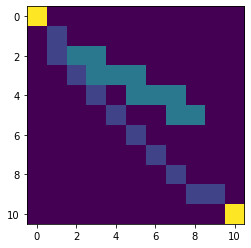

In [6]:

import numpy as np
import matplotlib.pyplot as plt

# need map of values
# node class
# 

class node:
    def init(self):
        self.x = -1
        self.y = -1
        self.heuristic = 0
        #self.step_cost = -1
        self.local_cost = 1000
        self.parent = np.empty(1, dtype=node)
        self.neighbors = []
        self.global_cost = 1000
        self.visited = False
        



map_width = 11
map_height = 11
end_x = 10
end_y = 10

astar = True
map_int = np.zeros((map_width,map_height),dtype=int)
map_int[2,2:4] = 2
map_int[3,3:6] = 2
map_int[4,5:8] = 2
map_int[5,7:9] = 2
#print(map_int)

map = np.empty((map_width,map_height), dtype=node)


for x in range(map_width):
    for y in range(map_height):
        map[x][y] = node()
        map[x][y].init()
        map[x][y].x = x
        map[x][y].y = y

        if astar:
            map[x][y].heuristic = np.sqrt((x-end_x)**2 + (y-end_y)**2)



        
        

for x in range(map_width):
    for y in range(map_height):

        # Check legal neighbor bounds
        if (x-1)<0:
            s_x = x
        else: s_x = x-1

        if (y-1) < 0:
            s_y = y
        else: s_y = y-1

        if (x+1) > map_width-1:
            e_x = x
        else: e_x = x+1

        if (y+1) > map_height-1:
            e_y = y
        else: e_y = y+1

        for x_n in range(s_x, e_x+1):
            for y_n in range(s_y, e_y+1):
                if ((x_n != x or y_n != y) and map_int[x_n][y_n] == 0):
                    map[x][y].neighbors.append(map[x_n][y_n])







start_node = map[0][0]
start_node.local_cost = 0
end_node = map[10][10]

to_search = []
to_search.append(start_node)
searching = True
c = 0

while searching:

    current_node = to_search[0]
    for n in current_node.neighbors:
        step_cost = np.sqrt((n.x-current_node.x)**2 + (n.y-current_node.y)**2)


        if current_node.local_cost + step_cost < n.local_cost:
            n.local_cost = current_node.local_cost + step_cost
            n.global_cost = n.local_cost + n.heuristic
            n.parent = current_node

            if n.x == end_node.x and n.y == end_node.y:
                searching = False

            if not n.visited:
                to_search.append(n)

    to_search[0].visited = True
    to_search.pop(0)
    to_search = sorted(to_search, key=lambda node_s: node_s.global_cost)

    c += 1
    if c > 1000:
        print('waaaay too long bud')
        searching = False

    if not to_search:
        print('lsit empty')
        searching = False


path = end_node
backtracking = True
map_h = np.zeros((map_width, map_height))
while backtracking:
    path = path.parent
    map_h[path.x][path.y] = 1

    if path.parent.x == start_node.x and path.parent.y == start_node.y:
        backtracking = False

map_int[0,0] = 5
map_int[10,10] = 5
map_h = map_h + map_int

print(end_node.local_cost)


plt.figure(1)
plt.imshow(map_h)





